In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Introduction

Neural networks are a type of machine learning algorithms developped to solved classification or regression problem. They mimic the way our humain brain works.

Let's go in the shoes of a brillant doctor (if you are a TV show savvy like me, you can choose to be Dr House, Dr Aaron Glassman or Dr Cristina Yang) and explain how the brain works. The brain is a collection of neurons linked with one another. They are composed with multiple ***dentrites*** and an ***axon***. those elements allow the neurons to be connected to each other. The physical location where the neurons are connected is called ***synapses***. The intensity of this connection is variable.

To put it in a nutshell, a neuron transmits information to an other neuron through the connection axon/dentrites and this connection is as strong as the synapses. The inputs are taken through the dentrites which ***activates*** the neuron and when the neuron is activated, it transmits information to another neuron via its axon.

![](maxresdefault.jpg)

Those notions are important for themselves. But if I put you in the shoes of a physicist, it is not just for the pleasure of the experience. I think it will give a good background for the remainder of this exposé. If you are interested to know how the machine learning and the neuroscience are intertwined, I recommand you to read [this article](http://www.columbia.edu/cu/appliedneuroshp/Papers/out.pdf)

# A traditional machine learning model: Logistic Regression Classifier

## Classical representation of the Logistic Regression

The Logistic Regression Classifier (LRC) is used to make predictions on binary variable. In this section, I want to represent the LRC as a neuron or, more precisely, as a perceptron. But first, what is the standard representation of the LCR? (It will get a bit theoretical but bear with me, it is for the higher good)

Let's suppose, we have a set $\{(\hat{X}_i,\hat{y}_i), i \in [[0,n]]\}$ such as $\forall i, \hat{y}_i \in \{0,1\}$ and $\hat{X}_i \in R^m$.
We would expect that a "machine learns" on this dataset means that we find a function $f_\theta$ such as:
$$\forall i \in [[0,n]], f_\theta (\hat{X}_i) = \hat{y}_i$$
However, there are many things wrong (or too optimistic, to put it mildly) with this expectation. let's take two points:

1. **Lack of Generalisation**: The goal of a machine learning model is not to avoid mistakes but to estimate the general rule which explain the output ($y_i$) from the input ($X_i$). This general rule is only partially defined by the observed dataset because there is a noise in the measure, which means, instead of observing the true $(X_i,y_i)$ we have a noisy $(\hat{X}_i,\hat{y}_i)$
2. **Smoothness**: The function $f_\theta$ is defined as a function from $R^m$ to $\{0,1\}$. So this function is not continuous. However, to ease the computation endeavor to calibrate (or identify) the parameter $\theta$ some level of smoothness is needed.

So, in the Logistic Regression framework, we will say that "the machine has learned" when it finds the parameter $\theta$ which minimizes:
$$ J(\theta) = - \frac{1}{n}\sum_{i=1}^{n} \bigg(y_i.log(f_\theta{}(X_i))+(1-y_i)log(1-f_\theta{}(X_i))\bigg) $$

$J$ is called the cost function. Hence, instead of trying to have an equality between the estimate and the observed value, we try to reduce the cost (or the error) to a minimum. This will allow our machine to have a better generalisation power.

Moreover, $f_\theta$ does not try to replicate the output, per se. Instead, it will try to estimate the probability of an observation having $y=1$. $f_\theta$ is the sigmoid function:
$$f_\theta(X)=\frac{1}{1+e^{-\theta^TX}}$$

So, the cost function and the sigmoid function resolve our two issues (lack of generalisation and smoothness).

All this is a bit theoretical, but with this understanding, we are already equiped to do some interpretations. If we assume $P(Y=1|X)=\frac{1}{1+e^{-\theta^TX}}$ (as the LRC does), the risk ratio 1/0 is $Ratio_{1/0}(X):=\frac{P(Y=1|X)}{P(Y=0|X)}=\frac{P(Y=1|X)}{1-P(Y=1|X)}=e^{\theta^TX}$

therefore, $$\frac{1}{Ratio_{1/0}}\times\frac{\partial Ratio_{1/0}}{\partial X}=\theta$$

TADA! This equation says that the relative increase of the risk with a slight increase of $X$ is $\theta$

In [10]:
def sigmoid(X,theta):
    """ computation of a sigmoid: X is the matrix of characteristics (row: observations. columns:characteristics)
    theta is the parameter (1 row)"""
    res = X.dot(theta.T)
    res = 1/(1+np.exp(-res))
    return res

In [73]:
X_ex = np.matrix(np.linspace(-100,100)).T
theta = np.matrix([0.25])
sig = sigmoid(X_ex,theta)

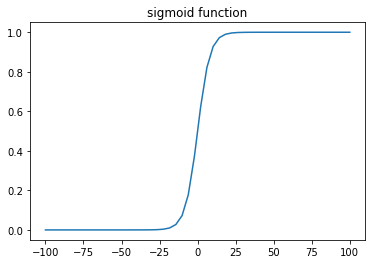

In [78]:
plt.figure()
plt.plot(X_ex,sig)
plt.title("sigmoid function")
plt.show()

## Neural network representation

In the last section, we saw the classic representation of the LCR and how to interpret the parameter. In this section, I want make a link between the neuroscience experience we did (remember? Dr Aaron Glassman taking a look in the function of the neuron?) and the logistic regression model.